# 1. For reading and understanding import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"G:\kaggle-24\Titanic-23\test.csv"
test_df = pd.read_csv(path)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
test_df.shape

(418, 11)

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Name, Cabin and Ticket feature is not relevant for predicting. So drop 3 features.
test_df.drop(columns = ["Name","Cabin","Ticket"], inplace = True)

In [6]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [7]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [8]:
test_df['Age']= test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']= test_df['Fare'].fillna(test_df['Fare'].mean())

In [9]:
for col in test_df.columns:
    print(col)
    print(test_df[col].value_counts())
    print("."*50)

PassengerId
PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64
..................................................
Pclass
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
..................................................
Sex
Sex
male      266
female    152
Name: count, dtype: int64
..................................................
Age
Age
30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: count, Length: 80, dtype: int64
..................................................
SibSp
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
..................................................
Parch
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64
.....................

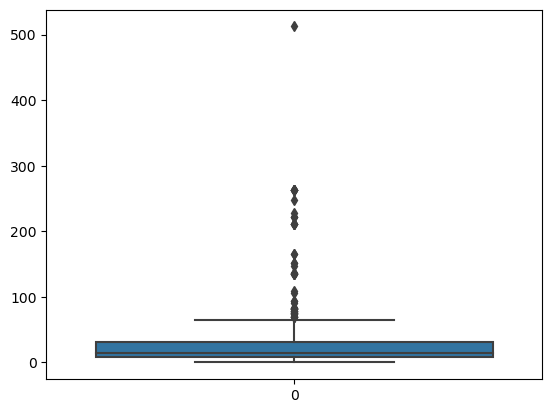

In [10]:
sns.boxplot(data=test_df['Fare']) 
plt.show()

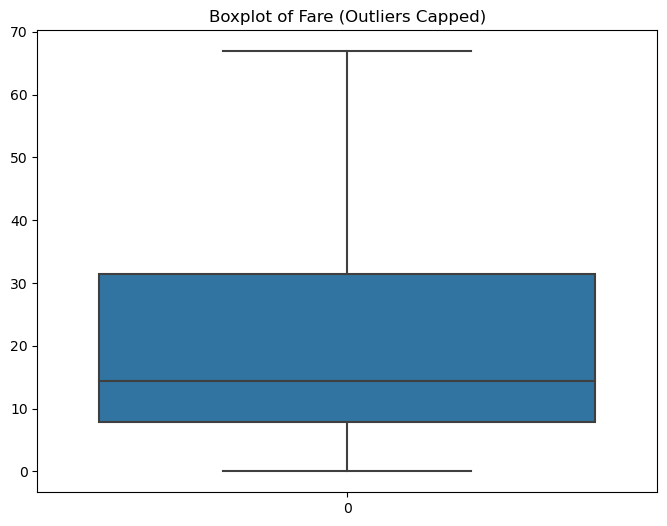

In [11]:
# Calculate quartiles and IQR
Q1 = test_df['Fare'].quantile(0.25)
Q3 = test_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap outliers by setting values beyond the bounds to the bounds
test_df['Fare'] = np.where(test_df['Fare'] > upper, upper, test_df['Fare'])

# Visualize the boxplot after capping outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=test_df['Fare'])
plt.title('Boxplot of Fare (Outliers Capped)')
plt.show()

Skewness of Original Fare: 1.0836025159300169


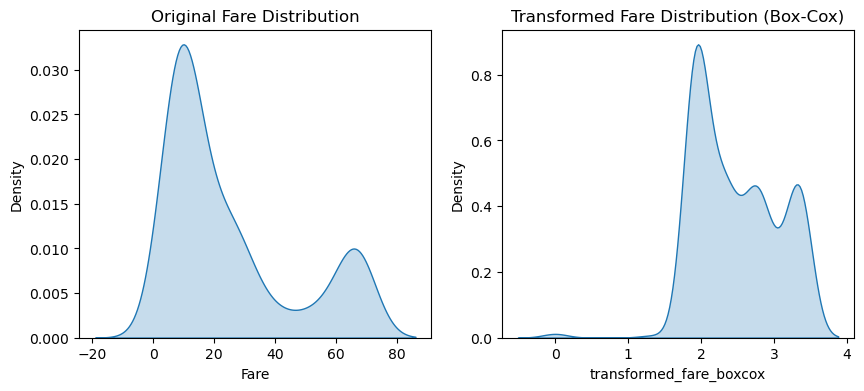

Skewness of Transformed Fare (Box-Cox): 0.0010056337301237806


In [12]:
from scipy.stats import boxcox

# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(test_df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", test_df['Fare'].skew())

# Apply the Box-Cox transformation
transformed_fare, lambda_value = boxcox(test_df['Fare'] + 1)  # Adding 1 to handle zero values
test_df['transformed_fare_boxcox'] = transformed_fare

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(test_df['transformed_fare_boxcox'], fill = True)
plt.title('Transformed Fare Distribution (Box-Cox)')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare (Box-Cox):", test_df['transformed_fare_boxcox'].skew())

In [13]:
test_df.drop(columns = ['Fare'], inplace=True)

In [14]:
def age(x):
    if x<=18:
        return "Kid"
    elif x<=35:
        return "Young"
    elif x<=50:
        return "Middle Age"
    else:
        return "Aged"
test_df['age_dis'] = test_df['Age'].apply(age)

In [15]:
test_df.drop(columns = ['Age'], inplace = True)

In [16]:
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,transformed_fare_boxcox,age_dis
0,892,3,male,0,0,Q,1.934319,Young
1,893,3,female,1,0,S,1.856488,Middle Age
2,894,2,male,0,0,Q,2.082654,Aged
3,895,3,male,0,0,S,2.004750,Young
4,896,3,female,1,1,S,2.247954,Young


In [17]:
test_df['family_size'] = test_df['SibSp'] + test_df['Parch']

In [18]:
test_df.drop(columns=['SibSp','Parch'], inplace = True)

In [19]:
test_df.head()

,PassengerId,Pclass,Sex,Embarked,transformed_fare_boxcox,age_dis,family_size
0,892,3,male,Q,1.934319,Young,0
1,893,3,female,S,1.856488,Middle Age,1
2,894,2,male,Q,2.082654,Aged,0
3,895,3,male,S,2.004750,Young,0
4,896,3,female,S,2.247954,Young,2


In [20]:
test_df.replace({'Sex':{'female':0, 'male':1}}, inplace = True)

In [21]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Embarked', 'transformed_fare_boxcox',
       'age_dis', 'family_size'],
      dtype='object')

In [22]:
path = r'G:\kaggle-24\Titanic-23\fresh_data.csv'
train_df = pd.read_csv(path)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,transformed_fare_boxcox,age_dis,family_size
0,1,0,3,1,S,2.304372,Young,1
1,2,1,1,0,C,5.015438,Middle Age,1
2,3,1,3,0,S,2.398221,Young,0
3,4,1,1,0,S,4.723612,Young,1
4,5,0,3,1,S,2.414882,Young,0


In [23]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 42)

# For Prediction use RandomForestClassifier

In [24]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['transformed_fare_boxcox']
ordinal_features = ['Pclass']
categorical_features = ['Sex', 'Embarked', 'age_dis']

preprocessor = ColumnTransformer( 
    transformers = [
        ("num", MinMaxScaler(), numeric_features),
        ("ord", OrdinalEncoder(), ordinal_features),
        ("cat", OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)

y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Accuracy_train_RF: {accuracy_train_rf}\nAccuracy_test_RF: {accuracy_test_rf}")

cm = confusion_matrix(y_test, y_pred_test_rf)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_rf = classification_report(y_test, y_pred_test_rf)

print(f"Classification_report:\n{classification_report_rf}")

Accuracy_train_RF: 1.0
Accuracy_test_RF: 0.8171641791044776
Confusion_matrix:
 [[140  17]
 [ 32  79]]
Classification_report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.81 (+/- 0.02)


In [26]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Embarked', 'transformed_fare_boxcox',
       'age_dis', 'family_size'],
      dtype='object')

# Make Prediction CSV submission file

In [27]:
# Select features for prediction from the test data
test_features = test_df[['PassengerId', 'Pclass', 'Sex', 'Embarked', 'transformed_fare_boxcox', 'age_dis', 'family_size']]

# Make predictions on the test data
test_predictions = rf_pipeline.predict(test_features)

# Create a DataFrame with 'PassengerId' and predicted 'Survived'
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

In [28]:
submission = pd.read_csv(r"G:\kaggle-24\Titanic-23\submission.csv")
submission.shape

(418, 2)

In [29]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
